In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.datautils import *

In [3]:
train_df = pd.read_csv("../UCRArchive_2018/Coffee/Coffee_TRAIN.tsv", sep = '\t', header = None)
test_df = pd.read_csv("../UCRArchive_2018/Coffee/Coffee_TEST.tsv", sep = '\t', header = None)

In [4]:
print(train_df.shape)
print(test_df.shape)

(28, 287)
(28, 287)


In [13]:
random_index = np.random.randint(1,28)
random_index

14

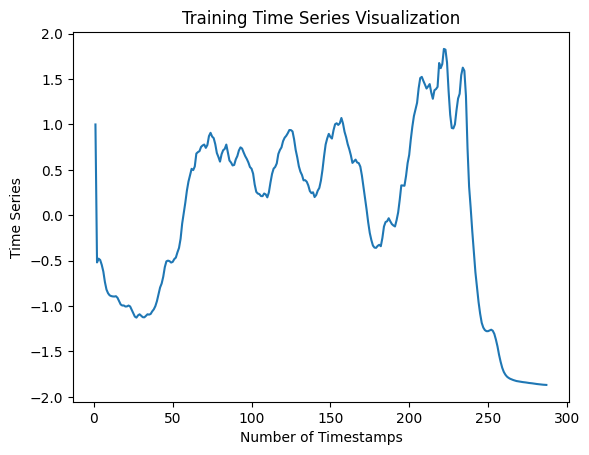

In [19]:
#plt.figsize(10,8)
x = np.arange(1,288)
y = train_df.iloc[random_index, :]
sns.lineplot(x = x,y = y)
plt.xlabel("Number of Timestamps")
plt.ylabel("Time Series")
plt.title("Training Time Series Visualization")
plt.show()